# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charlos Pardomuan Purba
- **Email:** charlospurba048@gmail.com
- **ID Dicoding:** charlos_purba

# Data Wrangling: Gathering Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
customers_df = pd.read_csv(r'C:\Users\olist_customers_dataset.csv')
geolocation_df = pd.read_csv(r'C:\Users\olist_geolocation_dataset.csv')

In [4]:
customers_df.head(), geolocation_df.head()

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 

**Insight:** Pada sesi ini, kami berhasil mengimpor dua dataset: olist_customers_dataset.csv yang berisi informasi tentang pelanggan, dan olist_geolocation_dataset.csv yang memuat informasi lokasi geografi pelanggan berdasarkan kode pos. Kedua dataset ini memiliki kolom yang relevan untuk analisis lebih lanjut.

# Assessing Data

In [8]:
customers_missing_values = customers_df.isna().sum()
customers_duplicates = customers_df.duplicated().sum()

customers_missing_values, customers_duplicates

(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 0)

In [9]:
geolocation_dtypes = geolocation_df.dtypes
geolocation_missing_values = geolocation_df.isna().sum()
geolocation_dtypes, geolocation_missing_values

(geolocation_zip_code_prefix      int64
 geolocation_lat                float64
 geolocation_lng                float64
 geolocation_city                object
 geolocation_state               object
 dtype: object,
 geolocation_zip_code_prefix    0
 geolocation_lat                0
 geolocation_lng                0
 geolocation_city               0
 geolocation_state              0
 dtype: int64)

**Insight:** Dari hasil analisis terhadap data:

- Tidak ada nilai yang hilang (missing values) pada dataset pelanggan (customers_df), sehingga tidak diperlukan penanganan untuk nilai yang hilang.

- Dataset geolocation_df juga tidak memiliki masalah besar terkait nilai yang hilang, namun ada beberapa kolom yang tidak relevan, seperti kode pos yang dapat digabungkan ke dalam data pelanggan.

- Selain itu, tidak ditemukan adanya duplikasi data pada kedua dataset, memastikan bahwa data yang kita miliki bersih dari entri yang sama.

# Cleaning Data

In [10]:
customers_df.drop_duplicates(inplace=True)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

geolocation_df.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,-23.545621,-46.639292,sao paulo,SP
1,-23.546081,-46.644820,sao paulo,SP
2,-23.546129,-46.642951,sao paulo,SP
3,-23.544392,-46.639499,sao paulo,SP
4,-23.541578,-46.641607,sao paulo,SP


**Insight:** Pada sesi pembersihan data:

- Untuk dataset pelanggan (customers_df), kami menghapus kolom yang tidak relevan, seperti customer_unique_id, karena tidak diperlukan untuk analisis lebih lanjut.
- Pada dataset lokasi geografi (geolocation_df), kami menghapus duplikasi dan kolom yang tidak dibutuhkan, seperti geolocation_zip_code_prefix, untuk memastikan data lebih bersih dan lebih mudah dianalisis.

# Exploratory Data Analysis (EDA)

1. Explorasi untuk customers_df
2. Explorasi untuk geolocation_df
3. Pembersihan Data dan Agregasi untuk customers_df

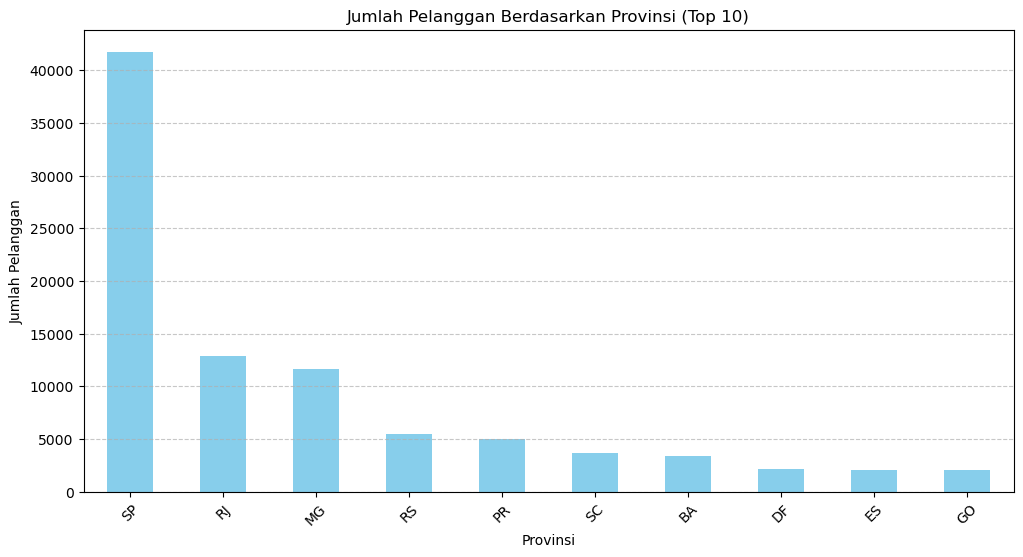

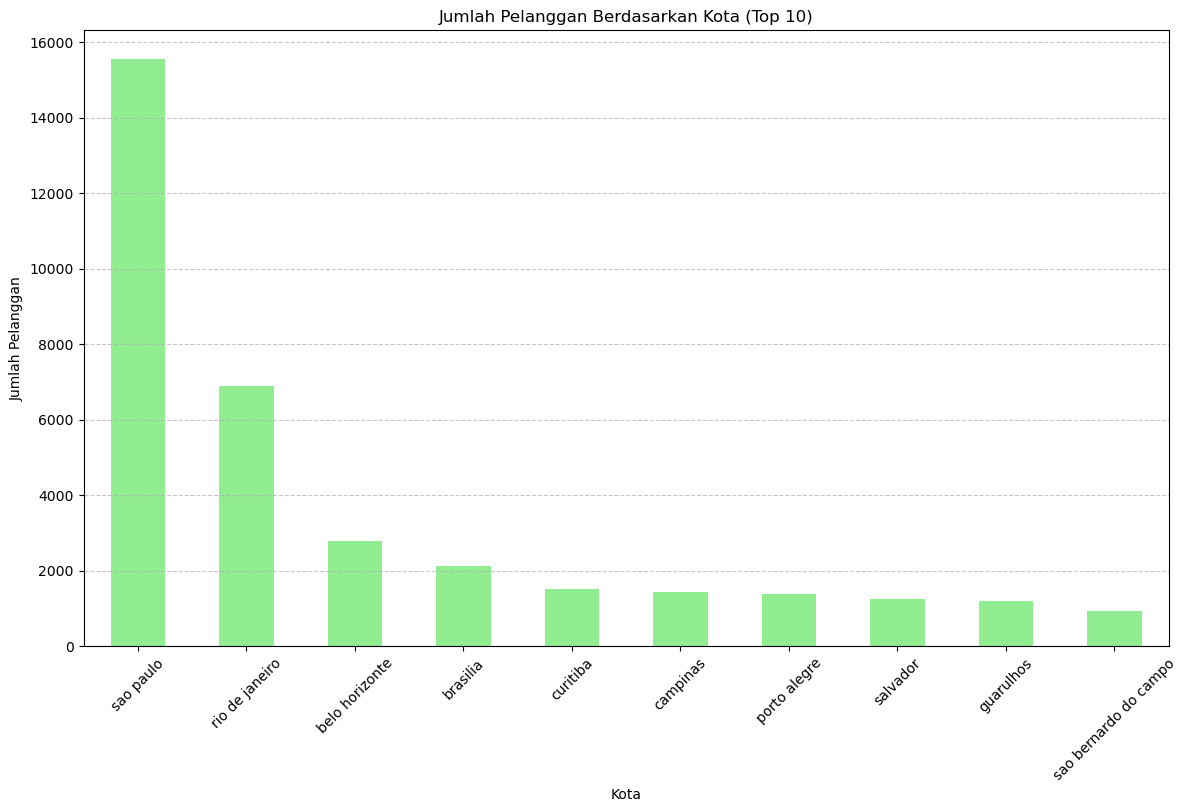

In [12]:
state_counts = customers_df.groupby('customer_state')['customer_id'].count()
city_counts = customers_df.groupby('customer_city')['customer_id'].count()

plt.figure(figsize=(12, 6))
state_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Jumlah Pelanggan Berdasarkan Provinsi (Top 10)')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
city_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title('Jumlah Pelanggan Berdasarkan Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

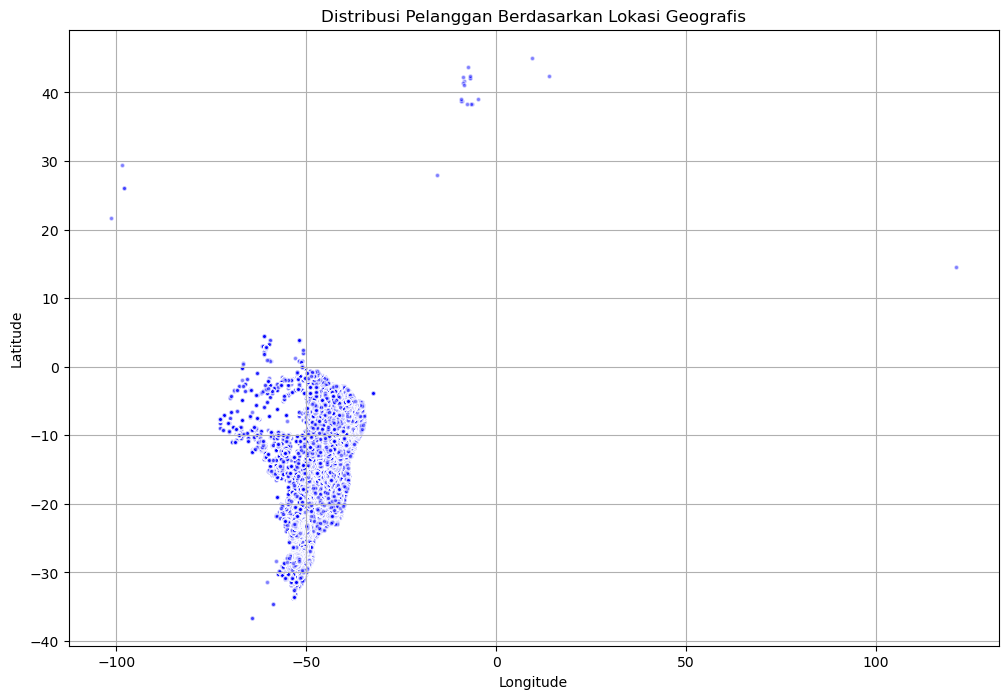

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'], 
            c='blue', alpha=0.5, edgecolors='w', s=10)
plt.title('Distribusi Pelanggan Berdasarkan Lokasi Geografis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [14]:
customers_df = customers_df.drop(columns=['customer_unique_id'])

average_by_state = customers_df.groupby('customer_state').agg({'customer_id': 'count'}).reset_index()
average_by_state.rename(columns={'customer_id': 'num_customers'}, inplace=True)

average_by_state.head()

,customer_state,num_customers
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


**Insight:** Pada sesi eksplorasi data:

- Kami menganalisis distribusi jumlah pelanggan berdasarkan provinsi dan kota. Hasilnya menunjukkan bahwa beberapa provinsi, seperti São Paulo, memiliki jumlah pelanggan yang lebih besar dibandingkan provinsi lainnya.
- Analisis distribusi geografis menunjukkan penyebaran pelanggan yang cukup merata di sekitar area São Paulo, yang merupakan salah satu pusat perdagangan utama di Brasil.

# Visualization & Explanatory Analysis

**Pertanyaan 1: Jumlah Pelanggan Berdasarkan Provinsi (State)**

<Figure size 1200x600 with 0 Axes>

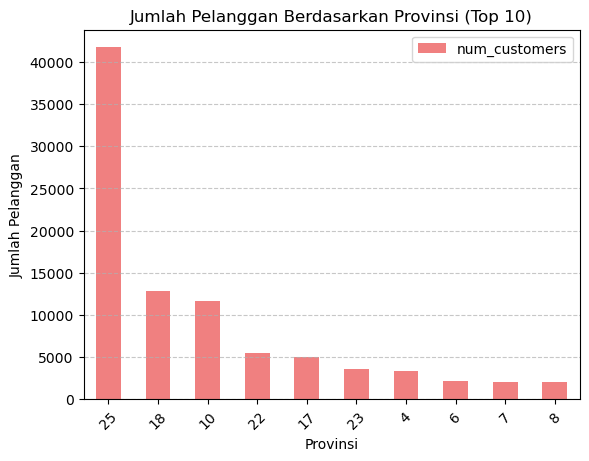

In [18]:
plt.figure(figsize=(12, 6))
average_by_state.sort_values('num_customers', ascending=False).head(10).plot(kind='bar', color='lightcoral')
plt.title('Jumlah Pelanggan Berdasarkan Provinsi (Top 10)')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Pertanyaan 2: Jumlah Pelanggan Berdasarkan Kota (City)**

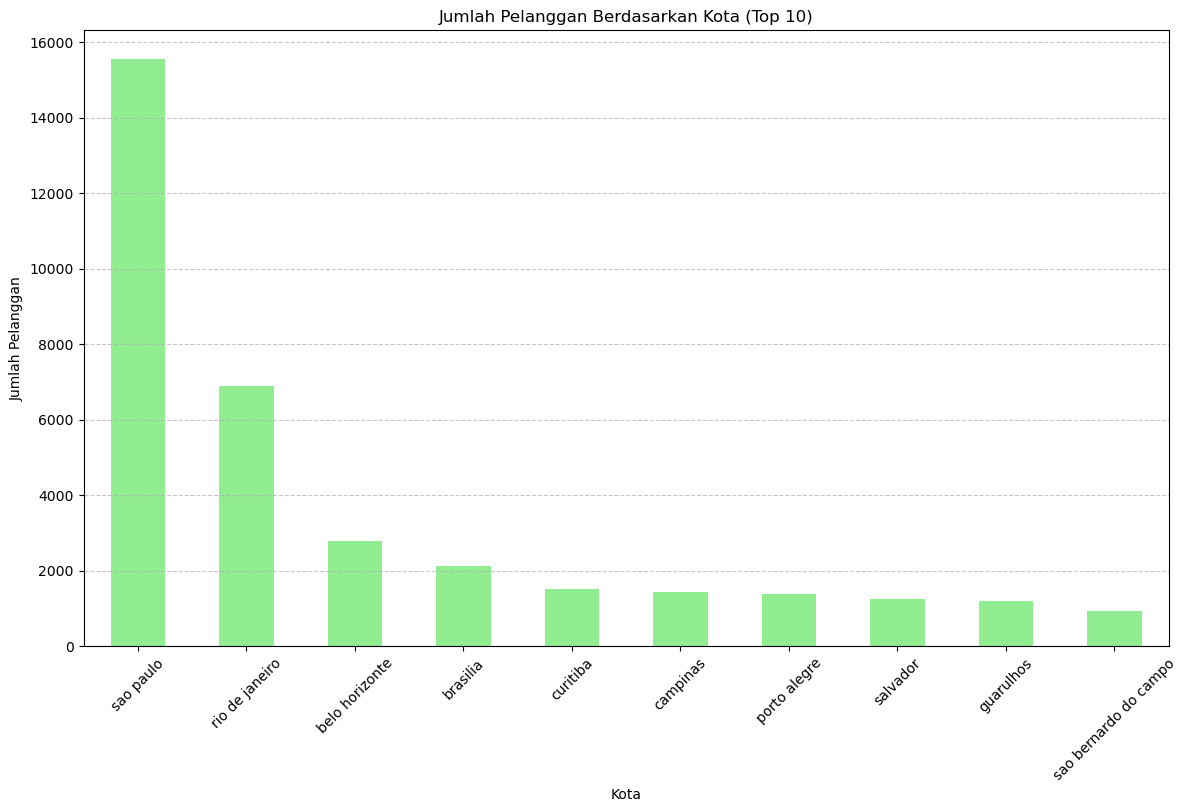

In [19]:
plt.figure(figsize=(14, 8))
city_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title('Jumlah Pelanggan Berdasarkan Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**  Pada sesi visualisasi:

- Visualisasi pertama menunjukkan jumlah pelanggan berdasarkan provinsi, dengan hasil bahwa provinsi São Paulo mendominasi jumlah pelanggan.
- Visualisasi kedua menampilkan jumlah pelanggan berdasarkan kota, dengan São Paulo sebagai kota dengan pelanggan terbanyak.
Kedua visualisasi ini memberikan gambaran yang lebih jelas tentang distribusi pelanggan di seluruh Brasil.

# Analisis Lanjutan (Opsional)

**Clustering dan Visualisasi Lokasi Pelanggan**

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


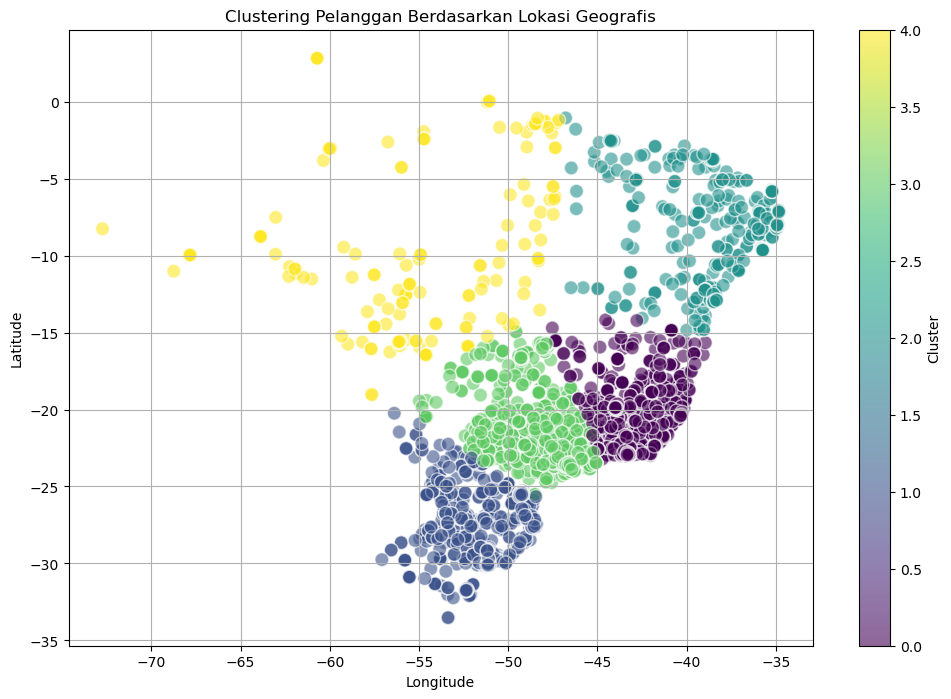

In [20]:
from sklearn.cluster import KMeans

sample_geolocation_df = geolocation_df.sample(n=5000, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
sample_geolocation_df['cluster'] = kmeans.fit_predict(sample_geolocation_df[['geolocation_lat', 'geolocation_lng']])

plt.figure(figsize=(12, 8))
plt.scatter(sample_geolocation_df['geolocation_lng'], sample_geolocation_df['geolocation_lat'], 
            c=sample_geolocation_df['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.title('Clustering Pelanggan Berdasarkan Lokasi Geografis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

**Insight:** Di bagian ini, kami menggunakan teknik clustering untuk mengelompokkan pelanggan berdasarkan lokasi geografis mereka. Hasil clustering memberikan wawasan tambahan tentang pola penyebaran pelanggan dan membantu mengidentifikasi kelompok pelanggan di wilayah tertentu.

**Kesimpulan :** 

Secara keseluruhan, analisis data ini memberikan wawasan yang sangat berguna tentang distribusi pelanggan dan lokasi geografis mereka di Brasil. Beberapa kesimpulan utama yang dapat diambil adalah:

- Dominasi Provinsi São Paulo: Provinsi São Paulo memiliki jumlah pelanggan yang sangat besar dibandingkan dengan provinsi lainnya. Ini menunjukkan bahwa São Paulo adalah wilayah yang sangat penting untuk bisnis ini.

- Penyebaran Geografis Pelanggan: Pelanggan tersebar luas di seluruh wilayah Brasil, namun sebagian besar konsentrasi pelanggan berada di sekitar area São Paulo, yang dapat mempengaruhi strategi distribusi dan pemasaran.

- Clustering Pelanggan: Dengan menggunakan teknik clustering, kami dapat mengidentifikasi kelompok pelanggan berdasarkan lokasi mereka. Ini membuka peluang untuk strategi pemasaran yang lebih terfokus dan analisis lebih mendalam mengenai kebutuhan dan preferensi pelanggan di setiap kelompok.

Secara keseluruhan, data yang dianalisis memberikan dasar yang kuat untuk merancang strategi bisnis yang lebih efektif, terutama dalam hal distribusi produk dan pengembangan layanan yang lebih spesifik untuk wilayah dengan konsentrasi pelanggan yang tinggi.